# Análisis de los datos obtenidos en los tests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Datos obtenidos

Importar los datos obtenidos en los tests creado por el programa App.java de la carpeta src.

In [2]:
# Read in the data from db
conn = sqlite3.connect("../db.sqlite")
df = pd.read_sql_query("SELECT * FROM execution_times", conn)
df.head()

,test_name,execution_time
0,isPrime,23900
1,isPrime,14600
2,isPrime,12700
3,isPrime,14200
4,isPrime,12600


Para analizar los datos mejor, se han separados los tests en diferentes columnas en el dataframe.

In [3]:
# Dive the data into the different unique values from the column "test_name"
tests = df["test_name"].unique()
print(tests)

# Create a new dataframe for each test
test_dfs = []
for test in tests:
    # Create new dataframe with only the test and execution time columns and reset the index
    new_df = df[df["test_name"] == test][["test_name", "execution_time"]].reset_index(
        drop=True
    )
    new_df = new_df.rename(columns={"test_name": test, "execution_time": f"time{test}"})
    test_dfs.append(new_df)

# Merge all the dataframes into one
merged_df = test_dfs[0]
for test_df in test_dfs[1:]:
    merged_df = pd.merge(merged_df, test_df, left_index=True, right_index=True)

merged_df.head()

['isPrime' 'trialDivision' 'trialDivision2' 'trialDivision3'
 'isPrimeBigInteger' 'millerRabin' 'millerRabin2']


,isPrime,timeisPrime,trialDivision,timetrialDivision,trialDivision2,timetrialDivision2,trialDivision3,timetrialDivision3,isPrimeBigInteger,timeisPrimeBigInteger,millerRabin,timemillerRabin,millerRabin2,timemillerRabin2
0,isPrime,23900,trialDivision,5500,trialDivision2,4300,trialDivision3,4200,isPrimeBigInteger,3000,millerRabin,6600,millerRabin2,8900
1,isPrime,14600,trialDivision,1600,trialDivision2,1800,trialDivision3,1600,isPrimeBigInteger,300,millerRabin,1800,millerRabin2,1900
2,isPrime,12700,trialDivision,1500,trialDivision2,1800,trialDivision3,1500,isPrimeBigInteger,300,millerRabin,1500,millerRabin2,1800
3,isPrime,14200,trialDivision,1500,trialDivision2,1800,trialDivision3,1500,isPrimeBigInteger,300,millerRabin,1500,millerRabin2,1600
4,isPrime,12600,trialDivision,1500,trialDivision2,1800,trialDivision3,1500,isPrimeBigInteger,300,millerRabin,1500,millerRabin2,1600


In [4]:
merged_df.describe()

,timeisPrime,timetrialDivision,timetrialDivision2,timetrialDivision3,timeisPrimeBigInteger,timemillerRabin,timemillerRabin2
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2327.040000,1.725280e+03,1408.990000,1467.590000,114.580000,1527.920000,1467.370000
std,6962.681145,2.153613e+04,548.562004,664.048709,270.389968,668.452808,1075.244111
min,1300.000000,1.300000e+03,1300.000000,1300.000000,0.000000,1300.000000,1300.000000
25%,1500.000000,1.400000e+03,1300.000000,1300.000000,100.000000,1300.000000,1400.000000
50%,1600.000000,1.400000e+03,1400.000000,1400.000000,100.000000,1400.000000,1400.000000
75%,2400.000000,1.500000e+03,1400.000000,1400.000000,100.000000,1500.000000,1500.000000
max,646700.000000,2.154200e+06,38600.000000,31500.000000,12400.000000,38700.000000,78800.000000


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   isPrime                10000 non-null  object
 1   timeisPrime            10000 non-null  int64 
 2   trialDivision          10000 non-null  object
 3   timetrialDivision      10000 non-null  int64 
 4   trialDivision2         10000 non-null  object
 5   timetrialDivision2     10000 non-null  int64 
 6   trialDivision3         10000 non-null  object
 7   timetrialDivision3     10000 non-null  int64 
 8   isPrimeBigInteger      10000 non-null  object
 9   timeisPrimeBigInteger  10000 non-null  int64 
 10  millerRabin            10000 non-null  object
 11  timemillerRabin        10000 non-null  int64 
 12  millerRabin2           10000 non-null  object
 13  timemillerRabin2       10000 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


## Datos de forma visual

En la siguientes gráficas se puede apreciar la diferencia de tiempo entre los diferentes tests realizados.

A continuación se muestran los datos en las siguientes gráficas:

- Gráfica de líneas
- Gráfica de líneas con x e y en escala logarítmica

<Axes: title={'center': 'Execution times for all tests'}>

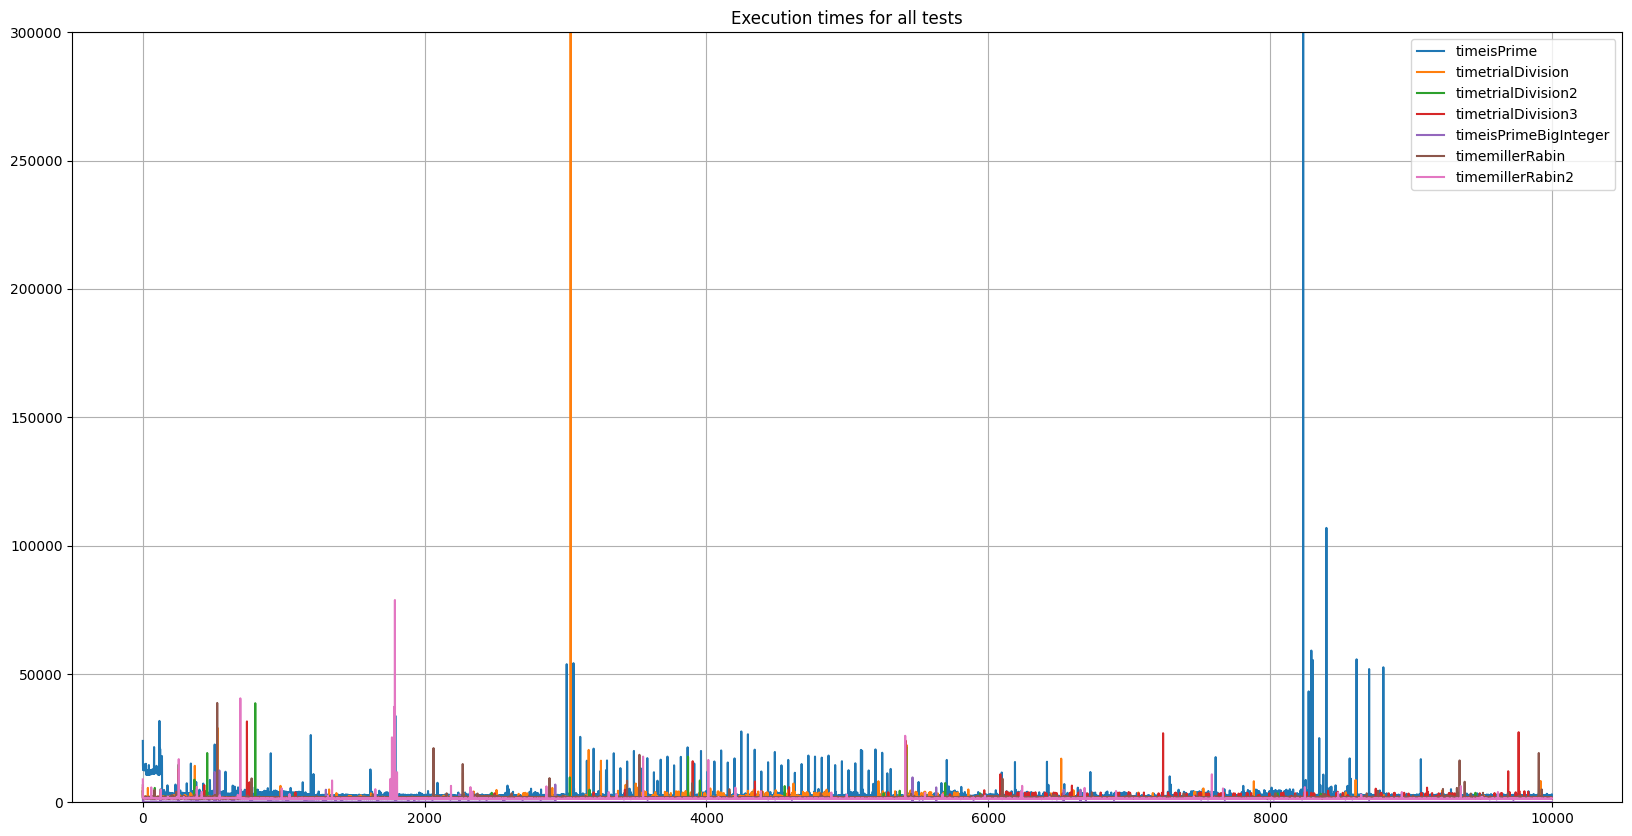

In [6]:
merged_df.plot(kind="line", figsize=(20, 10), title="Execution times for all tests", grid=True, ylim=(0, 0.3e6))

<Axes: title={'center': 'Execution times for all tests'}>

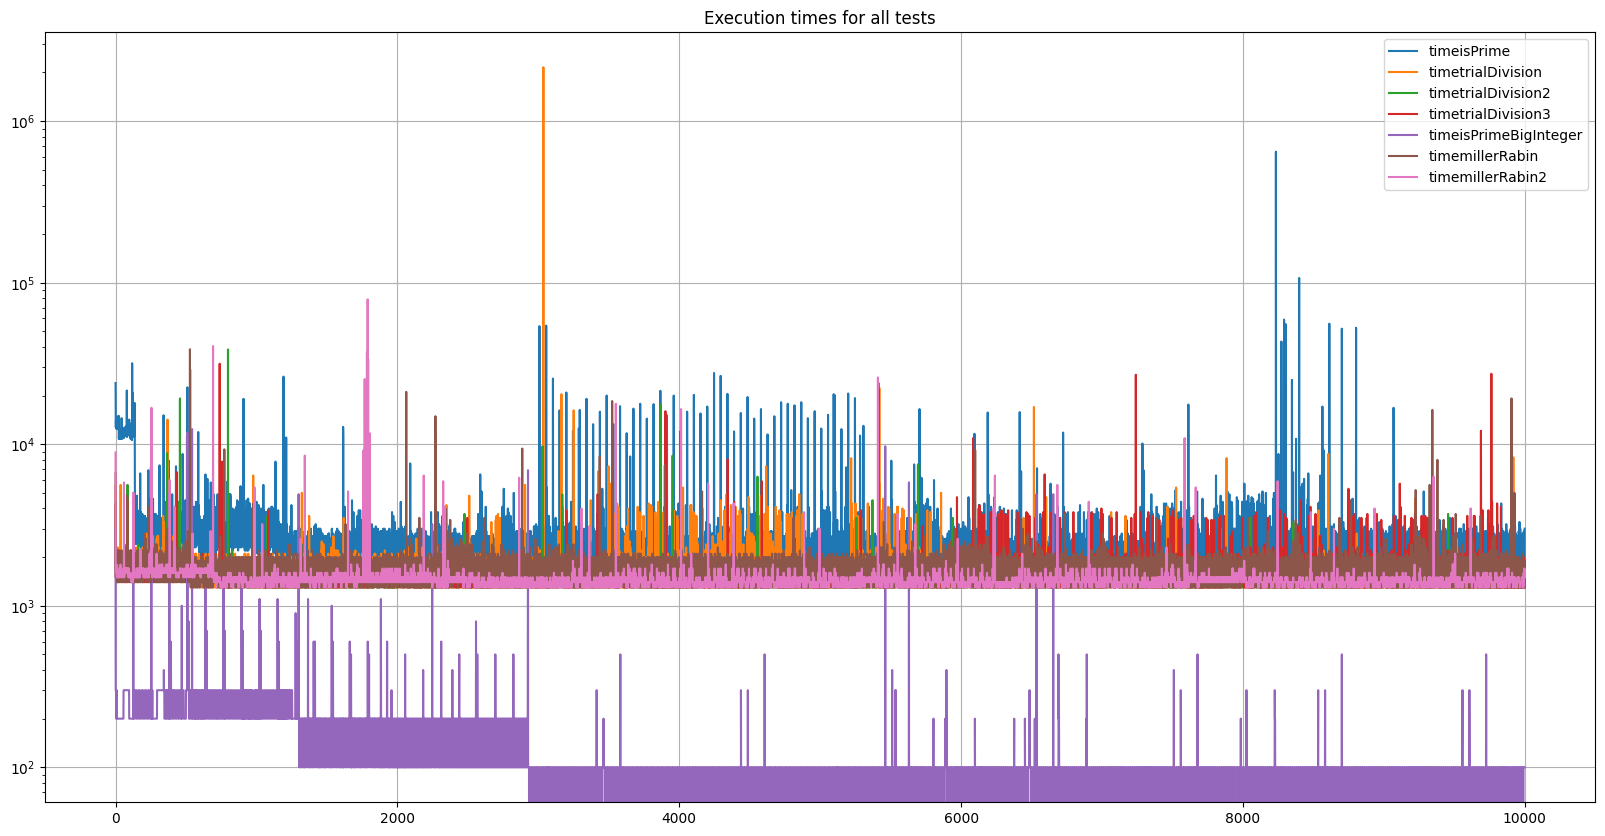

In [7]:
# Plot the data with a logarithmic y-axis
merged_df.plot(kind="line", figsize=(20, 10), title="Execution times for all tests", grid=True, logy=True)

<Axes: title={'center': 'Execution times for all tests'}>

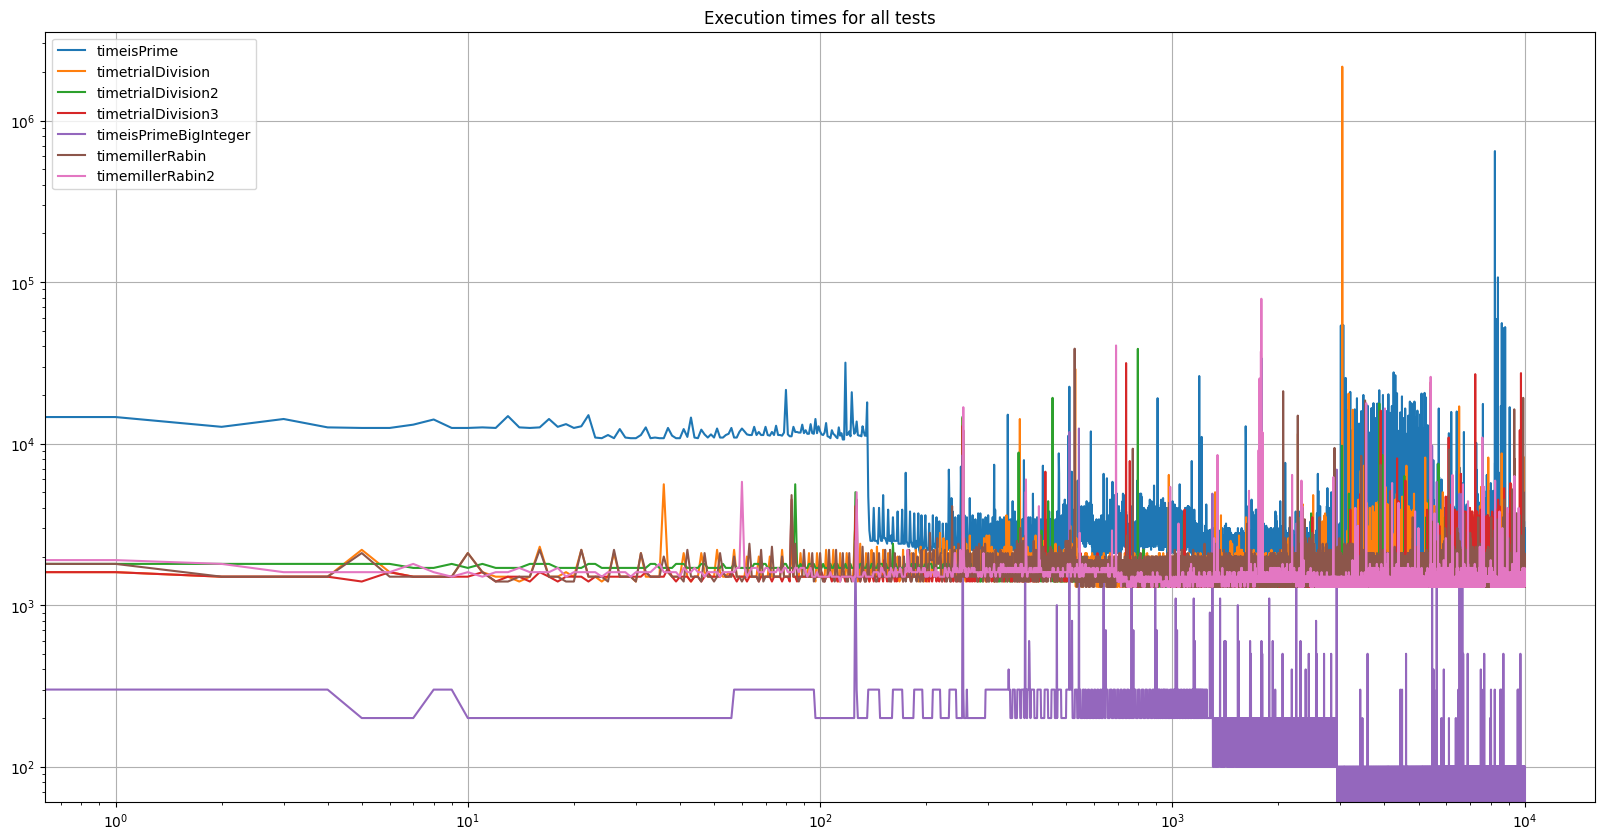

In [8]:
# Plot the data with a logarithmic y-axis and a logarithmic x-axis
merged_df.plot(kind="line", figsize=(20, 10), title="Execution times for all tests", grid=True, logy=True, logx=True)

## Guardar los datos

Una vez se han analizado los datos, se guardan para procesarlos en el siguiente notebook ([algorithms_analysis.ipynd](./algorithms_analysis.ipynb))

In [9]:
# Save dataframe to csv
merged_df.to_csv("../data.csv", index=False)

# save dataframe to sqlite
conn = sqlite3.connect("../db.sqlite")
merged_df.to_sql("data", conn, if_exists="replace", index=False)
conn.close()